## Black Friday Sales Prediction

The objective of the project is to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [219]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [220]:
#import the data
df_train = pd.read_csv(r'Blackfriday_train.csv')
df_test = pd.read_csv(r'Blackfriday_test.csv') 

In [221]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Since, we have seen the data now, let us check the definition of each column now

     Variable	                Definition
    User_ID	                    User ID
    Product_ID	                Product ID
    Gender	                    Sex of User
    Age	                        Age in bins
    Occupation	                Occupation (Masked)
    City_Category	            Category of the City (A,B,C)
    Stay_In_Current_City_Years	Number of years stay in current city
    Marital_Status	            Marital Status
    Product_Category_1	        Product Category (Masked)
    Product_Category_2	        Product may belongs to other category also (Masked)
    Product_Category_3	        Product may belongs to other category also (Masked)
    Purchase                      Purchase Amount (Target Variable)

In [222]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [223]:
print("train_data:", df_train.shape)
print("test_data:", df_test.shape)

train_data: (550068, 12)
test_data: (233599, 11)


In [224]:
#Create Category column for each dataset. 
df_train['Category'] = 'train'

In [225]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,train


In [226]:
df_test['Purchase'] = np.nan

In [227]:
df_test['Category'] = 'test'

In [228]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN,test
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN,test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN,test


Append train and test data

In [229]:
df =  pd.concat([df_train,df_test])

In [230]:
df.shape

(783667, 13)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  Category                    783667 non-null  object 
dtypes: float64(3),

### Exploratory Data Analytics

<AxesSubplot:xlabel='Gender', ylabel='count'>

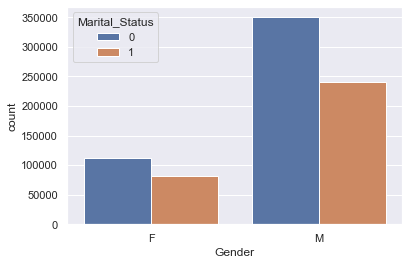

In [232]:
# Let us see the ratio of male and female
sns.set(style="darkgrid")
sns.countplot(x="Gender",hue="Marital_Status", data=df)

Married Males are most number of buyers

<AxesSubplot:xlabel='Age', ylabel='count'>

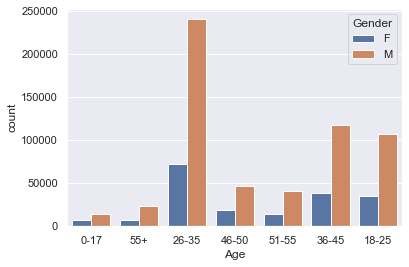

In [233]:
# Let us see the ratio of male and female
sns.set(style="darkgrid")
sns.countplot(x="Age",hue="Gender", data=df)

Males from Age group of 26-35 are the biggest category of buyer

<AxesSubplot:xlabel='Age', ylabel='count'>

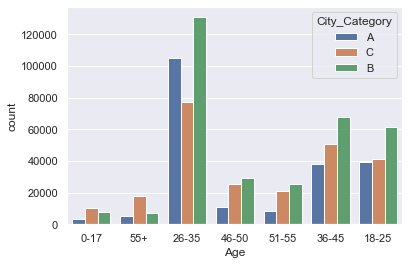

In [234]:
# Let us see the ratio of City and age group
sns.set(style="darkgrid")
sns.countplot(x="Age",hue="City_Category", data=df)

City B has the highest number of buyer

<AxesSubplot:xlabel='Occupation', ylabel='count'>

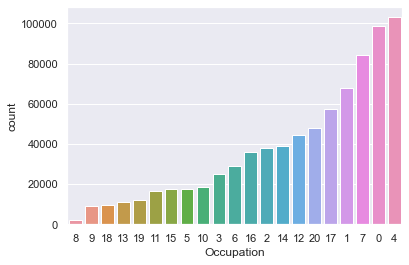

In [235]:
# Let us see the ratio of Occupation
sns.set(style="darkgrid")
sns.countplot(x="Occupation",data = df, order=df['Occupation'].value_counts().sort_values().index)

Let us see the relation of each categorical variable with Purchase

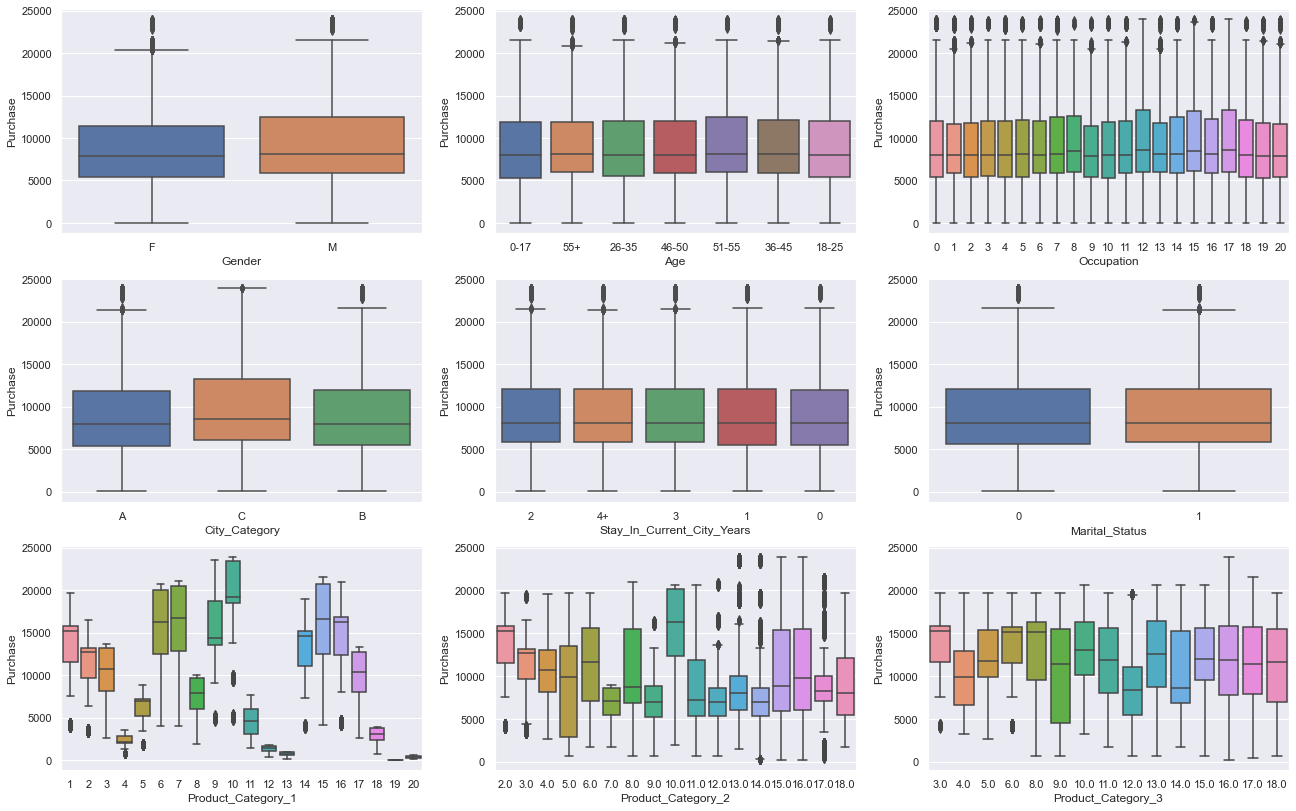

In [236]:
plt.figure(figsize=(22,14))
plt.subplot(3,3,1)
sns.boxplot(x = 'Gender', y = 'Purchase', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Age', y = 'Purchase', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Occupation', y = 'Purchase', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'City_Category', y = 'Purchase', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'Product_Category_1', y = 'Purchase', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'Product_Category_2', y = 'Purchase', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'Product_Category_3', y = 'Purchase', data = df)
plt.show()

There are a lot of variation by Product_category_1 & Product_category_2 by Purchase

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

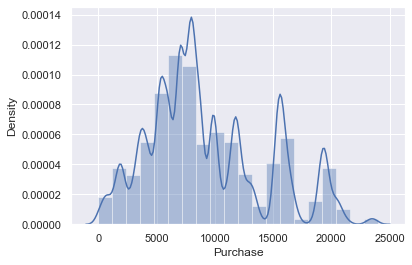

In [237]:
# Let us check for the distribution of numeric column or Target column Purchase
sns.distplot(df['Purchase'], bins = 20)

### Missing Value Imputation

We will impute with median by each user_id

In [238]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
Category                           0
dtype: int64

In Purchase column, the missing values are from test dataset. So we can ignore them now.Let us check for Product_Category_2 & Product_Category_3

In [239]:
df.isnull().sum()/df.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.313886
Product_Category_3            0.696481
Purchase                      0.298085
Category                      0.000000
dtype: float64

Product_Category_3 has almost 70% missing values and Product_Category_2 has 31% missing values. First check withProduct_Category_2 to impute the missing values

In [240]:
df2 = df.copy()

In [241]:
dfg = df2.groupby('User_ID')

In [242]:
#create a dataframe which is each user_id wise median value of Product_Category_2
missing_value = pd.DataFrame(dfg['Product_Category_2'].median()).reset_index()

In [243]:
missing_value.rename(columns={'Product_Category_2':'Median_Product_Category_2'},inplace = True)

In [244]:
missing_value.head()

,User_ID,Median_Product_Category_2
0,1000001,4.0
1,1000002,8.0
2,1000003,4.0
3,1000004,8.0
4,1000005,13.0


In [245]:
# add the new column to the dataset
df = pd.merge(df,missing_value,how = 'left',on = 'User_ID')

In [246]:
#Create a new columns of Product_Category_2 just to check how missing value imputation works
df['Product_Category_2_1']=np.where(df['Product_Category_2'].isnull(), df['Median_Product_Category_2'], df['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='Density'>

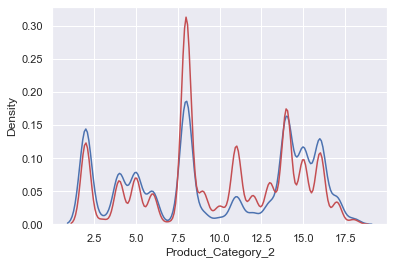

In [247]:
sns.kdeplot(df.Product_Category_2,color = 'b',shade=False,Label='Product_Category_2')
sns.kdeplot(df.Product_Category_2_1,color = 'r',shade=False,Label='Product_Category_2_1')

We can see that missing value imputation with median by each user does not make much change in the column. Hence, we can go ahead with median imputation.

Product_Category_3 has almost 70% missing value. We can drop this column

In [248]:
df.drop('Product_Category_3',axis = 1,inplace = True)

In [249]:
df['Product_Category_2'] = df['Product_Category_2_1'].copy()

In [250]:
df.drop(['Median_Product_Category_2','Product_Category_2_1'],axis = 1,inplace = True)

In [251]:
df.isnull().sum()/df.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.000000
Purchase                      0.298085
Category                      0.000000
dtype: float64

In [252]:
# Handle Categorical Data

# Gender
from sklearn.preprocessing import LabelEncoder
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

label_encoder_age = LabelEncoder()
df['Age'] = label_encoder_age.fit_transform(df['Age'])

label_encoder_city = LabelEncoder()
df['City_Category'] = label_encoder_city.fit_transform(df['City_Category'])


# 'Stay_In_Current_City_Years'
# replacing '4+' with 4
df.loc[df['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4


# Convert to integer
df['Gender'] = df['Gender'].astype(int)
df['Age'] = df['Age'].astype(int)
df['City_Category'] = df['City_Category'].astype(int)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['Product_Category_1'] = df['Product_Category_1'].astype(int)
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Occupation'] = df['Occupation'].astype(int)
df['Marital_Status'] = df['Marital_Status'].astype(int)

In [253]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Category
0,1000001,P00069042,0,0,10,0,2,0,3,4,8370.0,train
1,1000001,P00248942,0,0,10,0,2,0,1,6,15200.0,train
2,1000001,P00087842,0,0,10,0,2,0,12,4,1422.0,train
3,1000001,P00085442,0,0,10,0,2,0,12,14,1057.0,train
4,1000002,P00285442,1,6,16,2,4,0,8,8,7969.0,train


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int32  
 3   Age                         783667 non-null  int32  
 4   Occupation                  783667 non-null  int32  
 5   City_Category               783667 non-null  int32  
 6   Stay_In_Current_City_Years  783667 non-null  int32  
 7   Marital_Status              783667 non-null  int32  
 8   Product_Category_1          783667 non-null  int32  
 9   Product_Category_2          783667 non-null  int32  
 10  Purchase                    550068 non-null  float64
 11  Category                    783667 non-null  object 
dtypes: float64(1), int32(8), int64(1), object(2)
memory usage: 53.8+ MB


In [255]:
all_numeric =df.select_dtypes(include=['int32'])
cor = all_numeric.corr()

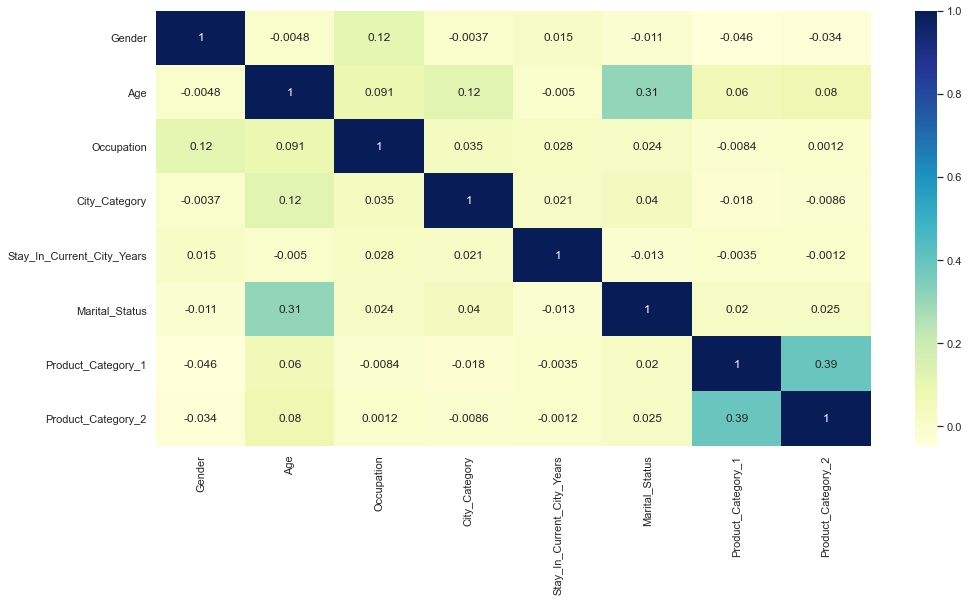

In [256]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [257]:
df.shape

(783667, 12)

In [258]:
df1 = df[df['Category']=='train']
#df_test = df[df['Category']=='test']

In [259]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Category
0,1000001,P00069042,0,0,10,0,2,0,3,4,8370.0,train
1,1000001,P00248942,0,0,10,0,2,0,1,6,15200.0,train
2,1000001,P00087842,0,0,10,0,2,0,12,4,1422.0,train
3,1000001,P00085442,0,0,10,0,2,0,12,14,1057.0,train
4,1000002,P00285442,1,6,16,2,4,0,8,8,7969.0,train


In [260]:
# Let us create dummy variables for the categorical ones

In [261]:
# Age_Group = pd.get_dummies(df_train['Age'],drop_first=True,prefix = 'Age')
# df_train = pd.concat([df_train,Age_Group],axis=1)


Occupation_1 = pd.get_dummies(df_train['Occupation'],drop_first=True,prefix = 'Occupation')
df1 = pd.concat([df1,Occupation_1],axis=1)


City_Category_1 = pd.get_dummies(df_train['City_Category'],drop_first=True,prefix = 'City_Category')
df1 =pd.concat([df1,City_Category_1],axis=1)


# Stay_In_Current_City_Years_1 = pd.get_dummies(df_train['Stay_In_Current_City_Years'],drop_first=True,prefix = 'Stay_In_Current_City_Years')
# df_train = pd.concat([df_train,Stay_In_Current_City_Years_1],axis=1)

Product_Category_1_dummies = pd.get_dummies(df1['Product_Category_1'],drop_first=True,prefix = 'Product_Category_1')
df1 = pd.concat([df1,Product_Category_1_dummies],axis=1)

Product_Category_2_dummies = pd.get_dummies(df1['Product_Category_2'],drop_first=True,prefix = 'Product_Category_2')
df1 = pd.concat([df1,Product_Category_2_dummies],axis=1)



df1 = df1.drop(['Occupation','City_Category','Product_Category_1','Product_Category_2'],axis=1)

In [262]:
df1.drop(['User_ID','Product_ID','Category'],axis=1,inplace = True)

In [263]:
df1.head()

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Purchase,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,...,Product_Category_2_9,Product_Category_2_10,Product_Category_2_11,Product_Category_2_12,Product_Category_2_13,Product_Category_2_14,Product_Category_2_15,Product_Category_2_16,Product_Category_2_17,Product_Category_2_18
0,0,0,2,0,8370.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,15200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,1422.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,1057.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,6,4,0,7969.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

Now Let's start model building by spliting the data into test and train section

In [264]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
#df_train_1, df_test_1 = train_test_split(df_train, train_size=0.7, test_size=0.3, random_state=100)

In [265]:
# Store independant variables to X
X = df1.drop(['Purchase'], axis = 1)
# Store dependant variable to y
y = df1['Purchase'].values

In [266]:
#Keep a copy of the dataset for further usage
df2 = df1.copy()

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (385047, 61)
X_test: (165021, 61)
y_train: (385047,)
y_test: (165021,)


In [268]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [269]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-7.66824779e+01  9.44325513e+01  4.65031498e+00 -7.05748486e+01
 -5.30355799e+01  4.66219526e+01  2.20094582e+02  1.33957627e+02
  3.21319719e+01  2.21380229e+02  1.23362896e+02 -3.80962957e+02
  9.69033192e+01  1.85041166e+02  9.95446999e+01  2.87448481e+02
 -1.98615376e+01  1.99376513e+02  3.36887872e+02  1.07395409e+02
  1.64418475e+02 -7.56250790e+01 -2.99358441e+02 -1.13552863e+02
  1.30070851e+02  5.53161354e+02 -1.88559730e+03 -2.55536828e+03
 -1.09459268e+04 -7.43849052e+03  2.06215069e+03  2.72332579e+03
 -6.16889643e+03  2.02083656e+03  6.06549442e+03 -8.86376510e+03
 -1.23283316e+04 -1.28936239e+04 -4.22349985e+02  1.04794377e+03
  1.15305126e+03 -3.64625211e+03 -1.07047036e+04 -1.37395133e+04
 -1.34049580e+04 -5.34274509e+02 -1.08961416e+03 -4.73420140e+02
  3.81833483e+02  5.29339285e+02  1.92388732e+02  4.17914886e+01
  3.53091195e+02 -1.56384829e+02 -4.69377457e+01 -2.73876536e+01
 -3.90177744e+01 -1.61636392e+02  1.28126963e+01  5.61995312e+02
  5.76207491e+02]
13144.8

In [270]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True False  True  True
  True  True False False False  True  True  True  True False False False
 False False False False False False False False False False False False
 False]
[35 34 47 36 38 42 21 32 44 19 28 15 25 33 31 20 45 24 17 27 26 37 11 30
 29 10  1  1  1  1  1  1  1  2  1  1  1  1 13  4  3  1  1  1  1  8  5  9
 14 12 18 43 16 22 39 41 40 23 46  7  6]


In [271]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
495840,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
366955,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
267012,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
516764,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
358915,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [272]:
# Fitting the model with 20 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                 4.477e+04
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:22:19   Log-Likelihood:            -3.6331e+06
No. Observations:              385047   AIC:                         7.266e+06
Df Residuals:                  385031   BIC:                         7.266e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.374e+

In [273]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [274]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.47
4,Product_Category_1_5,1.42
7,Product_Category_1_8,1.36
1,Product_Category_1_2,1.10
9,Product_Category_1_11,1.10
2,Product_Category_1_3,1.09
5,Product_Category_1_6,1.09
3,Product_Category_1_4,1.05
6,Product_Category_1_7,1.02
8,Product_Category_1_10,1.02


In [275]:
y_train_price = lm1.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

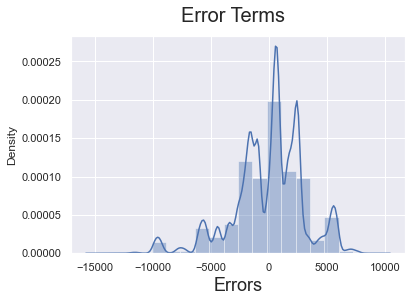

In [276]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

In [277]:
X_test_rfe2 = X_test[col1]

In [278]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165021 entries, 343184 to 8990
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   const                  165021 non-null  float64
 1   Product_Category_1_2   165021 non-null  uint8  
 2   Product_Category_1_3   165021 non-null  uint8  
 3   Product_Category_1_4   165021 non-null  uint8  
 4   Product_Category_1_5   165021 non-null  uint8  
 5   Product_Category_1_6   165021 non-null  uint8  
 6   Product_Category_1_7   165021 non-null  uint8  
 7   Product_Category_1_8   165021 non-null  uint8  
 8   Product_Category_1_10  165021 non-null  uint8  
 9   Product_Category_1_11  165021 non-null  uint8  
 10  Product_Category_1_12  165021 non-null  uint8  
 11  Product_Category_1_13  165021 non-null  uint8  
 12  Product_Category_1_17  165021 non-null  uint8  
 13  Product_Category_1_18  165021 non-null  uint8  
 14  Product_Category_1_19  165021 non

In [279]:
# Making predictions
y_pred = lm1.predict(X_test_rfe2)

In [281]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6336862475002145